EDA and logistic Regresion
<h4>Titanic Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum() #missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

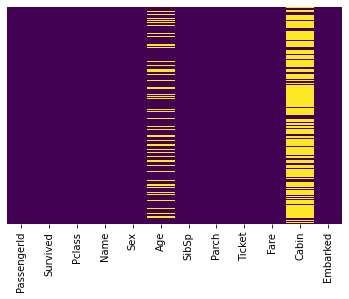

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #visuvalizing null values

<AxesSubplot:xlabel='Survived', ylabel='count'>

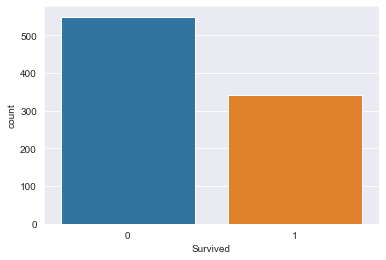

In [6]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

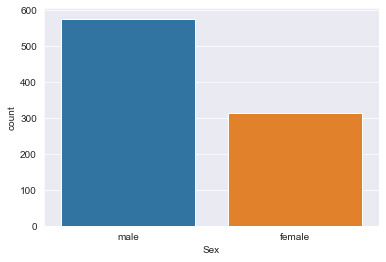

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

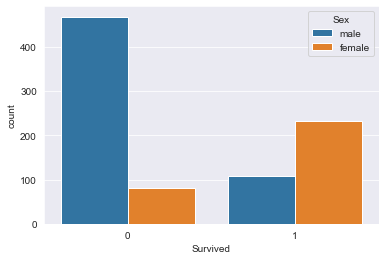

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

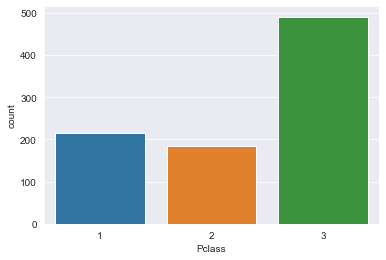

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='Pclass', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

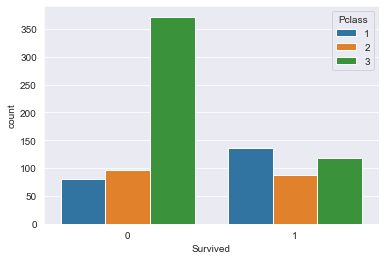

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

C:\Users\satvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

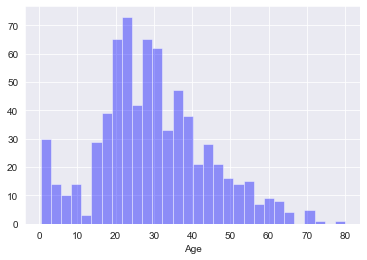

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='blue',bins=30)
#or you can also use using matplotlib function
#train['Age'].hist(bins=30,color='blue',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

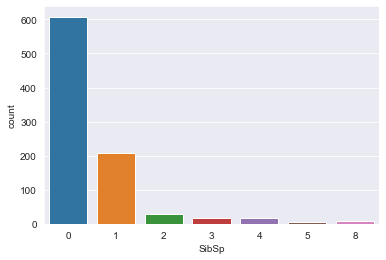

In [12]:
sns.countplot(x= 'SibSp', data= train)

<AxesSubplot:>

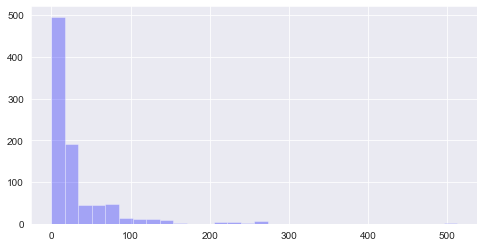

In [13]:
train['Fare'].hist(bins=30,color='blue',alpha=0.3, figsize=(8,4))

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

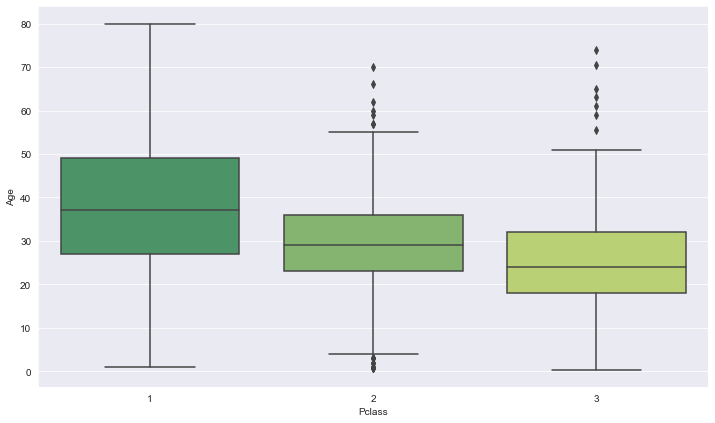

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=train,palette='summer')

In [15]:
def age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [16]:
train['Age']= train[['Age','Pclass']].apply(age, axis=1)

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.drop('Cabin',axis=1 , inplace= True)

In [19]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
train.dropna(inplace = True)

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

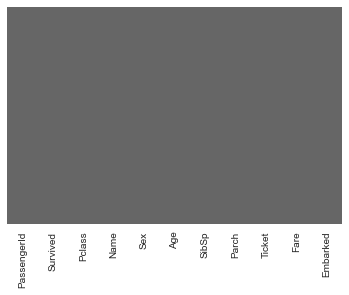

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r') #visuvalizing null values

# converting categorical features

<h6> Using pandas, we'll need to transform categorical features to dummy variables. Otherwise, our machine learning algorithm will be unable to use those features directly as inputs.

In [24]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
train.drop(['PassengerId','Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [26]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [27]:
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
import warnings

In [30]:
A = train.drop('Survived',axis=1).head(3) #droping dependent feature

In [31]:
B = train['Survived']
B.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,
                                                   random_state=101)

In [33]:
#x_train, x_test, y_train, y_test = train_test_split(A,B,test_size=0.30,random_state=101)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
# Train a logistic regression model with lbfgs solver and increased max_iter
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    #lr = LogisticRegression(max_iter=1000, solver='lbfgs')
    #lr = LogisticRegression()
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(x_train, y_train)

In [36]:
lr

LogisticRegression()

In [37]:
predictions = lr.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
accuracy=confusion_matrix(y_test,predictions)

In [40]:
accuracy

array([[150,  13],
       [ 33,  71]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8277153558052435

In [43]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [44]:
predictions = predictions.tolist()
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

# Evaluation

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

